#Data Load

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Libs

In [1]:
def import_modules():
    global utils, pd, np, plt, datetime, timedelta, gc, signal, glob, os, warnings
    import pandas as pd
    import numpy as np
    import gc
    import signal
    import glob
    import os
    import utils
    import warnings

In [2]:
import_modules()

In [3]:
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

#Wrapper

In [4]:
def clear_globals():
    """Очистка глобальных переменных"""
    keep_vars = ['utils', 'import_modules', 'gc', 'columns', 'path_to_dir', 'clear_globals']
    for var in list(globals().keys()):
        if var not in keep_vars:
            del globals()[var]

    import_modules()
    pd.set_option('display.max_columns', None)
    warnings.filterwarnings("ignore")

In [5]:
path_to_dir = '/content/drive/MyDrive/Quant/dataset_test'

columns = ['ServerTimestamp [epoch]',
           'MarketTimestamp [epoch]',
           'ServerTimestamp [datatime, us]',
           'MarketTimestamp [datatime,us]',
           'Mdtype',
           '[price;qty;nborders] ask 0',
           '[price;qty;nborders] ask 1',
           '[price;qty;nborders] ask 2',
           '[price;qty;nborders] ask 3',
           '[price;qty;nborders] ask 4',
           '[price;qty;nborders] ask 5',
           '[price;qty;nborders] ask 6',
           '[price;qty;nborders] ask 7',
           '[price;qty;nborders] ask 8',
           '[price;qty;nborders] ask 9',
           'M',
           '[price;qty;nborders] bid 0',
           '[price;qty;nborders] bid 1',
           '[price;qty;nborders] bid 2',
           '[price;qty;nborders] bid 3',
           '[price;qty;nborders] bid 4',
           '[price;qty;nborders] bid 5',
           '[price;qty;nborders] bid 6',
           '[price;qty;nborders] bid 7',
           '[price;qty;nborders] bid 8',
           '[price;qty;nborders] bid 9',
           'Obflag',
           'ftflagMSBid ',
           'ftflagMSAsk ',
           'ftflagTLSell ',
           'ftflagTLBuy ',
           'Stream ',
           'Revision ']

Processing file: /content/drive/MyDrive/Quant/dataset_test/Local#FAST_CURR_MD#MOEX_CURR#CETS#USDCNY_TOM.2023-08-14.gz


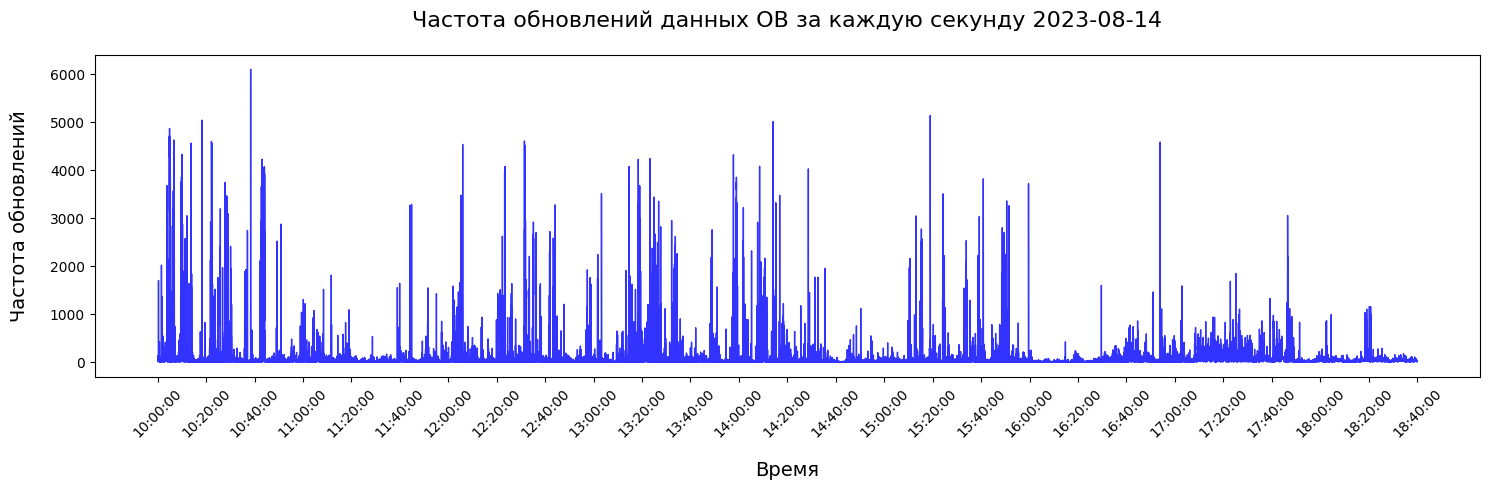

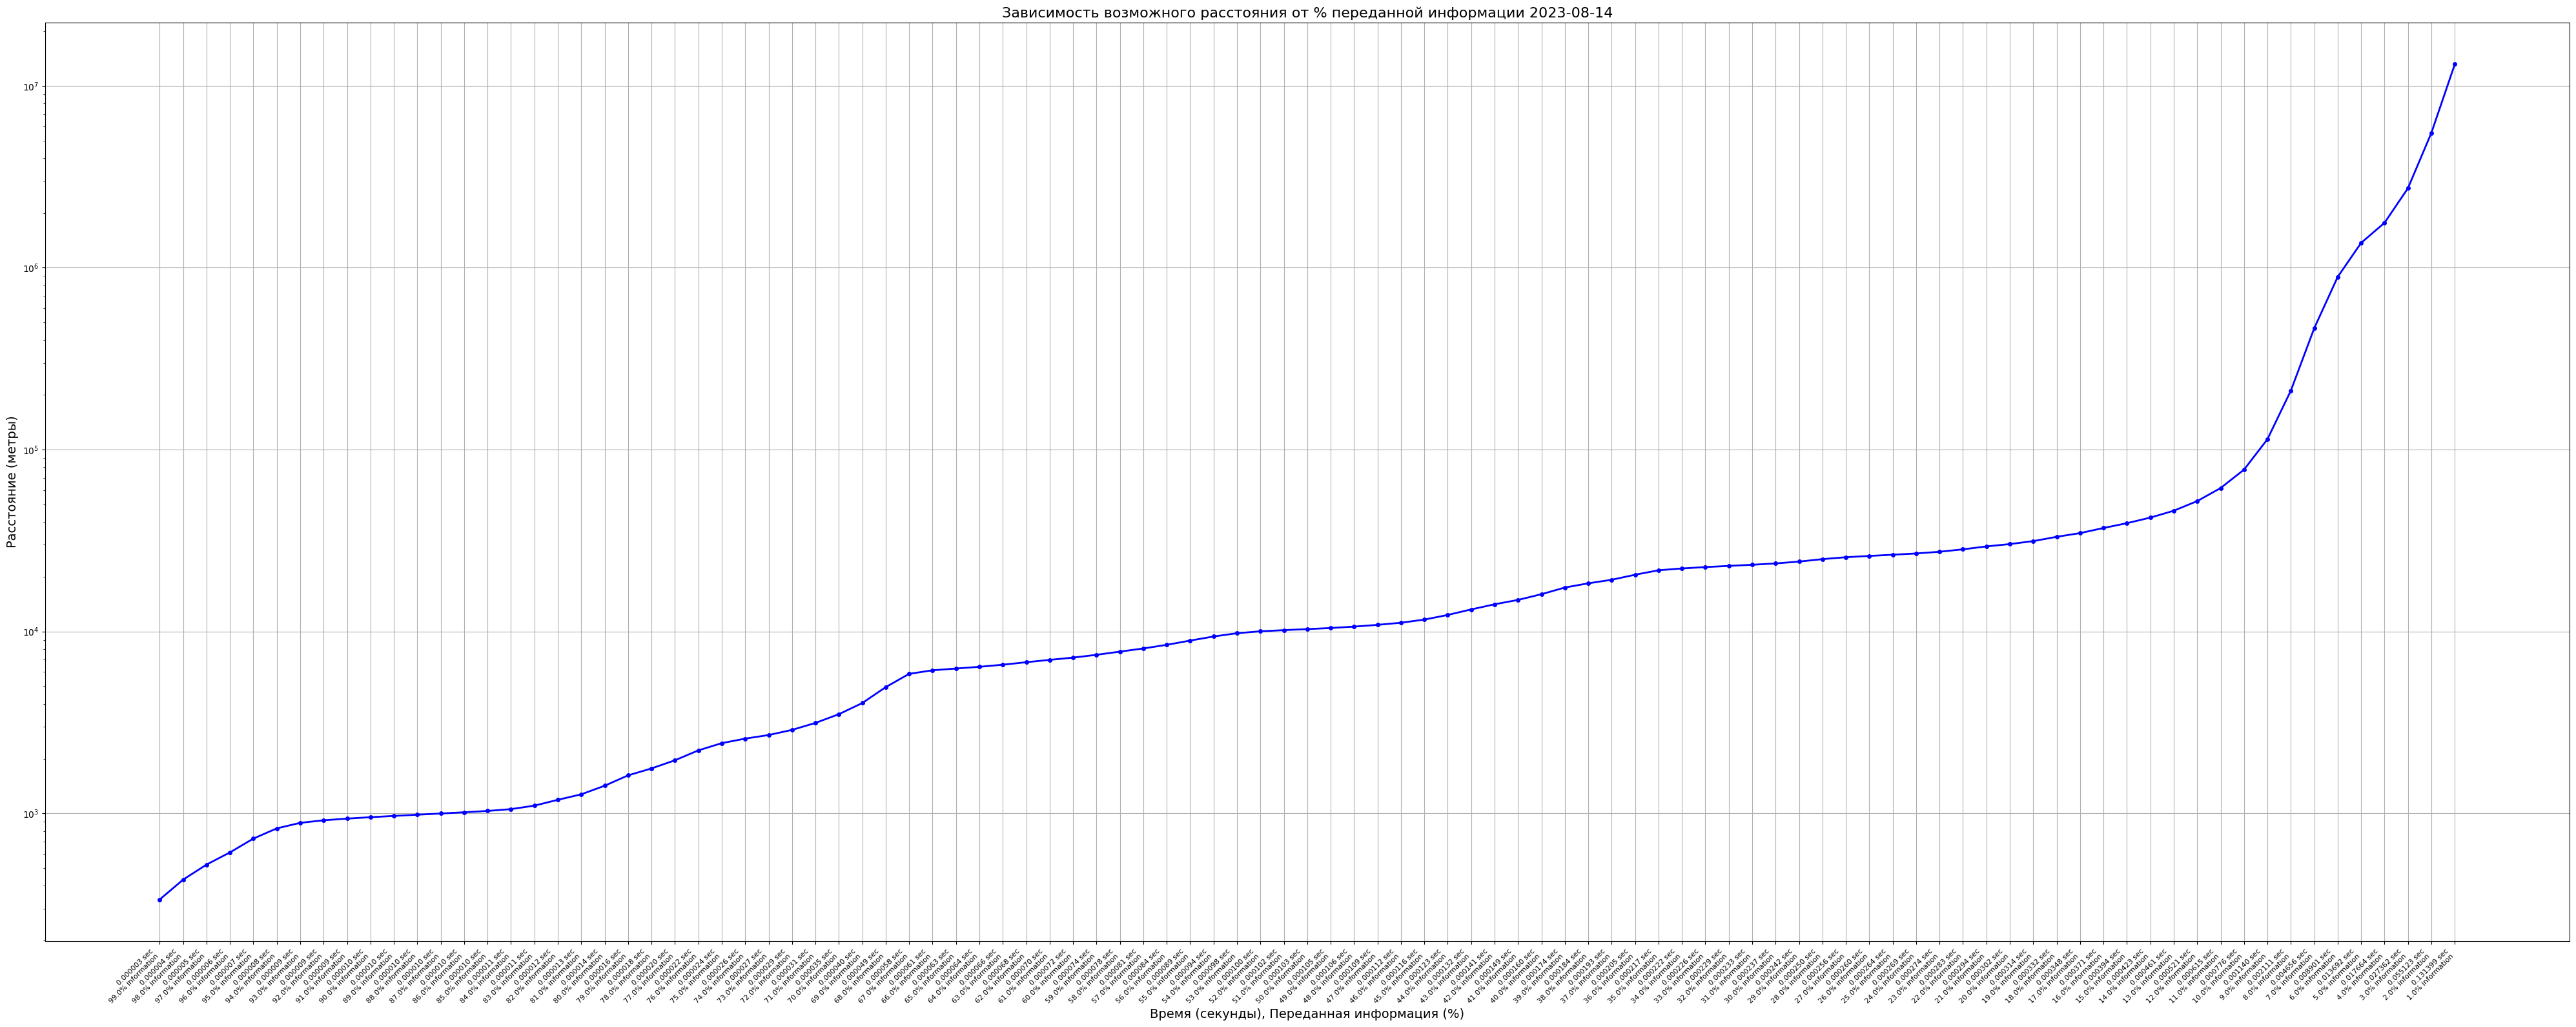


Статистики Qty трейдов 2023-08-14.
Mean: 96.8765243902439
StdDev: 169.76472580726883
Median: 50.0

Percentiles.
60%th Percentile: 66.00
70%th Percentile: 100.00
80%th Percentile: 100.00
90%th Percentile: 150.00

Вероятность совпадения стороны сделки последующего трейда 2023-08-14.
Probability(Qty >= mean): 0.8654
Probability(Qty >= median): 0.8364
Probability(Qty >= mean + stddev): 0.9363
Processing file: /content/drive/MyDrive/Quant/dataset_test/Local#FAST_CURR_MD#MOEX_CURR#CETS#USDCNY_TOM.2023-08-15.gz


In [ ]:
for filename in os.listdir(path_to_dir):
    file_path = os.path.join(path_to_dir, filename)

    if os.path.isfile(file_path) and filename.endswith('.gz'):
        try:
            print(f"Processing file: {file_path}")

            df = pd.read_csv(file_path, compression='gzip', names=columns, low_memory=False)
            df = utils.common_data_preparation(df)

            time = file_path.split('/')[-1].split('.')[1]

            utils.first_task(df, time)
            utils.second_task(df, time)

            clear_globals()

        except Exception as e:
            print(f"Error processing file {file_path}")
            clear_globals()